In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

In [52]:
import pandas as pd
data= pd.read_csv('dataset.csv').dropna().sort_values(by="date")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
long_df = pd.DataFrame(data.resample("QS-JUN")['total'].sum())
print(long_df)

                 total
date                  
2014-12-01   5103486.4
2015-03-01   7866201.9
2015-06-01  11472865.4
2015-09-01   8846187.0
2015-12-01   7968651.5
2016-03-01   7797864.0
2016-06-01  11923748.3
2016-09-01   8408397.1
2016-12-01   7908233.9
2017-03-01   8033506.1
2017-06-01  12225417.6
2017-09-01   8550108.7
2017-12-01   7811703.6
2018-03-01   8329069.1
2018-06-01  12458066.8
2018-09-01   9034033.2
2018-12-01   8188112.3
2019-03-01   8089296.4
2019-06-01  12050760.0
2019-09-01   8712078.0
2019-12-01   8199563.3
2020-03-01   8277424.6
2020-06-01  12374872.5
2020-09-01   9354412.3
2020-12-01   8075979.6
2021-03-01   8541644.6
2021-06-01  13143540.1
2021-09-01   9237336.6
2021-12-01   8333632.2
2022-03-01   8794202.9
2022-06-01  13040328.9
2022-09-01   9829352.8
2022-12-01   8437664.0
2023-03-01   2730620.2


In [62]:
long_df.to_csv('long_term_actual.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


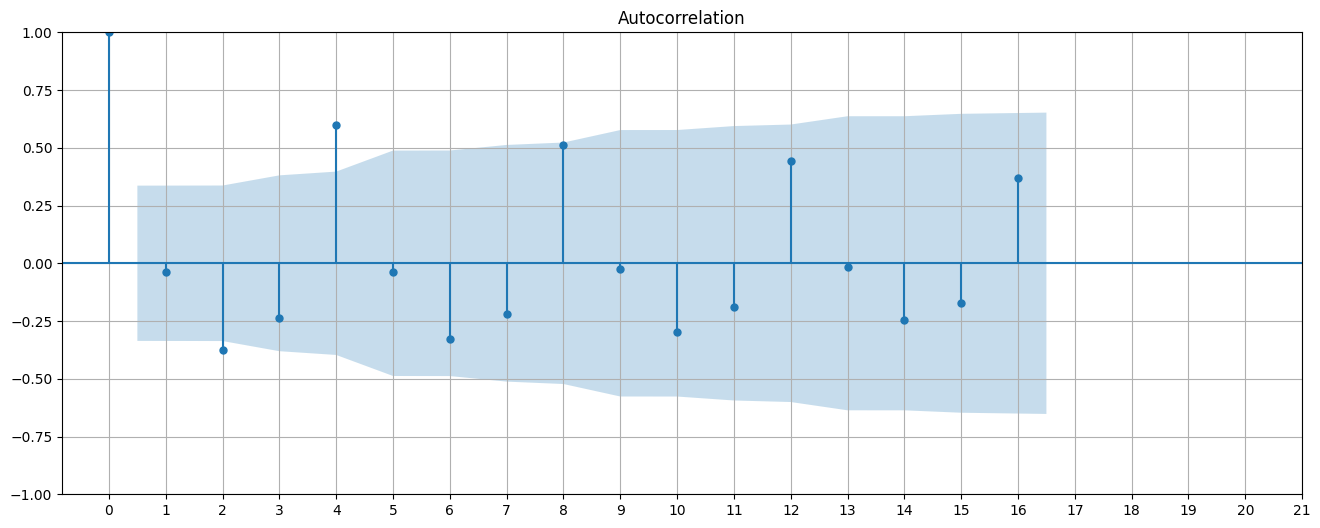

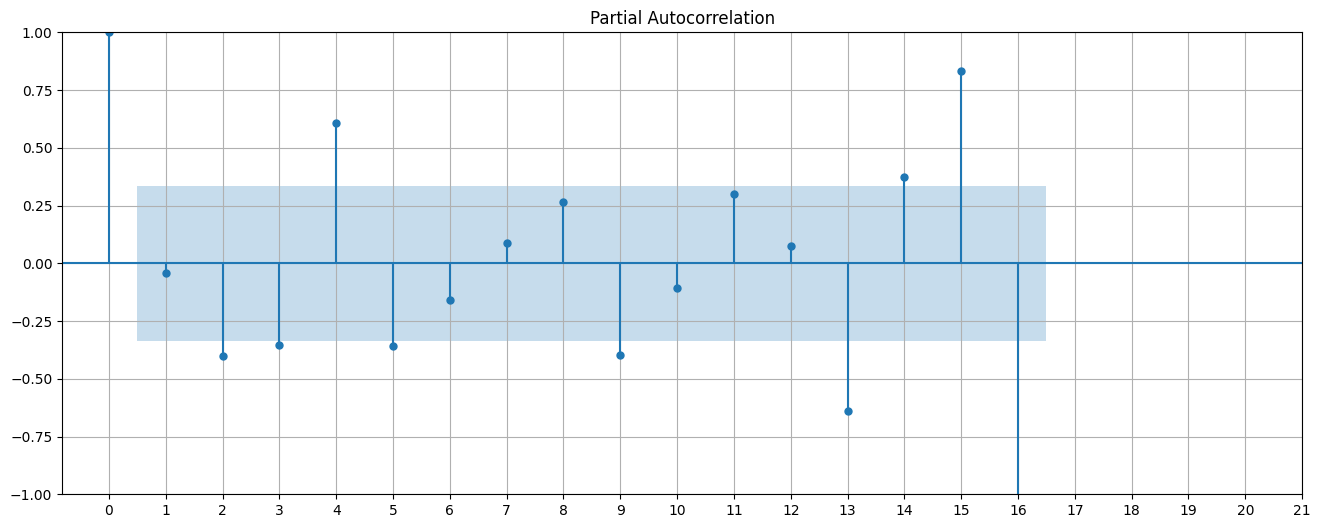

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_acf(long_df['total'],ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
#plt.show();
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_pacf(long_df['total'],ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.show();

<Figure size 4000x1500 with 0 Axes>

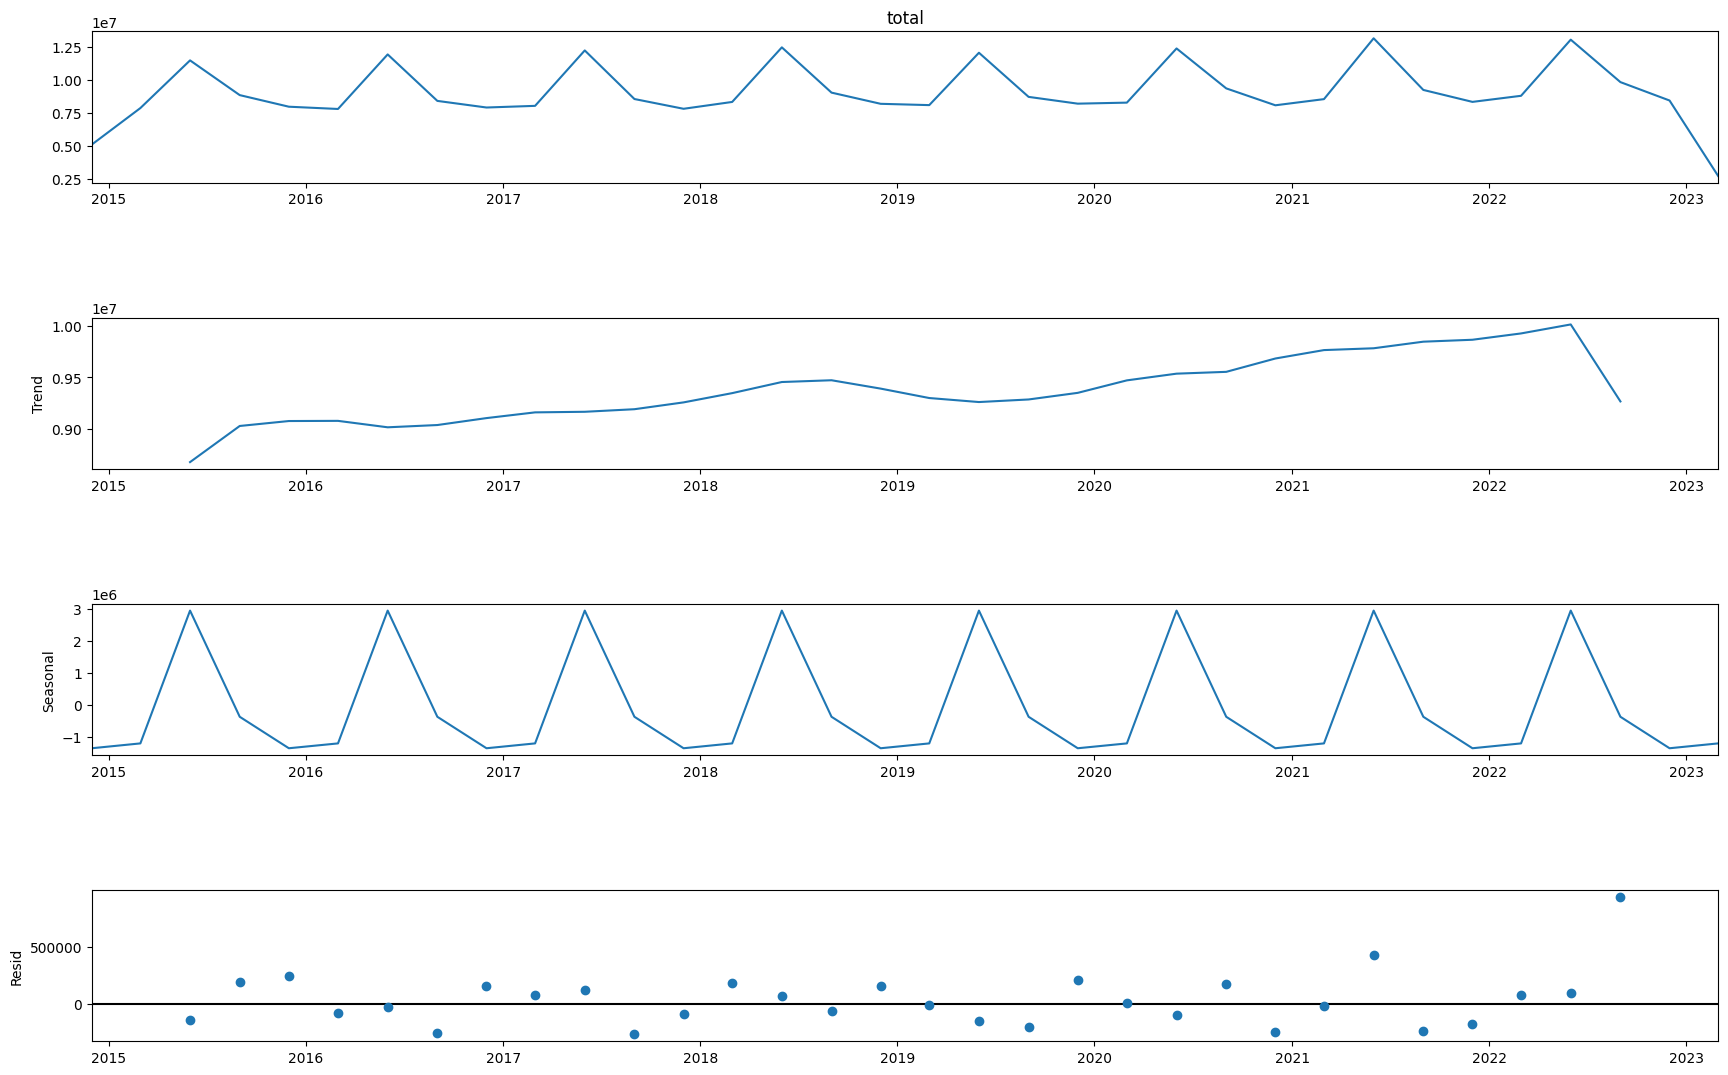

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(40,15))
result = seasonal_decompose(long_df['total'], model='additive', period=4)
fig=result.plot()
fig.set_figheight(12)
fig.set_figwidth(20)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   34
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -511.420
Date:                Tue, 11 Jul 2023   AIC                           1042.841
Time:                        14:08:51   BIC                           1057.806
Sample:                    12-01-2014   HQIC                          1047.876
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0909      1.024      0.089      0.929      -1.916       2.098
ar.L2         -0.0022      0.964     -0.002      0.998      -1.892       1.888
ar.L3         -0.1163      0.924     -0.126      0.9

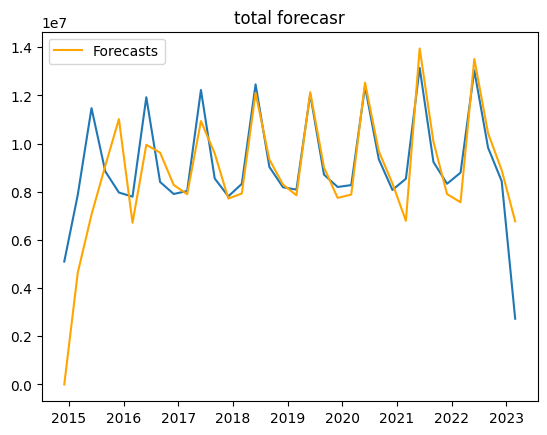

In [55]:
mod = ARIMA(long_df['total'], order=(4, 1, 5))
model_fit = mod.fit()
print(model_fit.summary())
plt.title('total forecasr')
plt.plot(long_df['total'], label='')
plt.plot(pd.DataFrame(model_fit.fittedvalues), label='Forecasts', color='orange')
plt.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   34
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -520.480
Date:                Tue, 11 Jul 2023   AIC                           1050.960
Time:                        14:09:07   BIC                           1058.442
Sample:                    12-01-2014   HQIC                          1053.477
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7900      0.118     -6.693      0.000      -1.021      -0.559
ar.L2         -0.7322      0.111     -6.575      0.000      -0.950      -0.514
ar.L3         -0.9381      0.109     -8.619      0.0

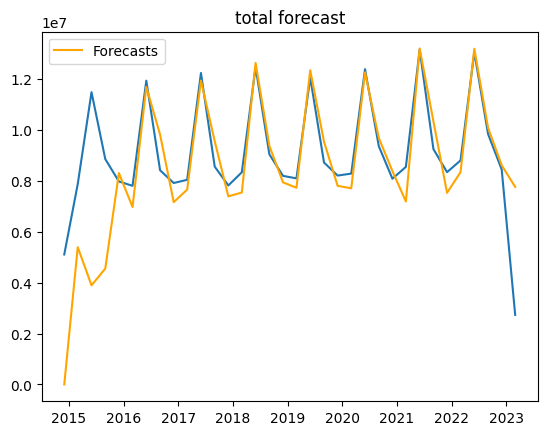

In [57]:
mod = ARIMA(long_df['total'], order=(3, 1, 1))
model_fit = mod.fit()
print(model_fit.summary())
plt.title('total forecast')
plt.plot(long_df['total'], label='')
plt.plot(pd.DataFrame(model_fit.fittedvalues), label='Forecasts', color='orange')
plt.legend();

In [58]:
print(model_fit.forecast(steps = 3))

2023-06-01    6.665465e+06
2023-09-01    9.040915e+06
2023-12-01    9.636909e+06
Freq: QS-JUN, Name: predicted_mean, dtype: float64


In [50]:
long_df['predicited_total'] = pd.DataFrame(model_fit.fittedvalues).to_csv('long_term_predict.csv')
pd.DataFrame(model_fit.forecast(steps = 3)).to_csv('long_term_forecast.csv')

In [60]:
df = data
df

,state,total
date,,
2015-01-01,NV,2802882.0
2015-02-01,NV,2300604.4
2015-03-01,NV,2576870.5
2015-04-01,NV,2469608.2
2015-05-01,NV,2819723.2
...,...,...
2022-11-01,NV,2822220.6
2022-12-01,NV,2953859.8
2023-01-01,NV,2881274.4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observation

                                              SARIMAX Results                                               
Dep. Variable:                                                total   No. Observations:                   99
Model:             SARIMAX(4, 0, 5)x(12, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood               -1141.476
Date:                                              Tue, 11 Jul 2023   AIC                           2340.953
Time:                                                      14:15:56   BIC                           2412.464
Sample:                                                  01-01-2015   HQIC                          2369.748
                                                       - 03-01-2023                                         
Covariance Type:                                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

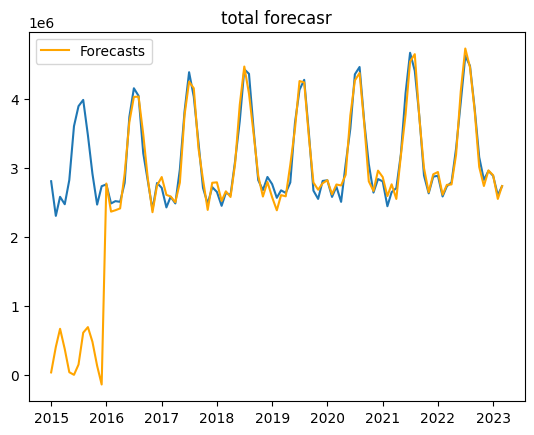

In [61]:
mod = sm.tsa.statespace.SARIMAX(endog=df['total'], order=(4,0,5),seasonal_order=(12,1, 6, 12),trend='c')
model_fit = mod.fit()
print(model_fit.summary())
plt.title('total forecast')
plt.plot(df['total'], label='')
plt.plot(pd.DataFrame(model_fit.fittedvalues), label='Forecasts', color='orange')
plt.legend();

In [63]:
print(model_fit.forecast(steps = 3))

2023-04-01    2.845727e+06
2023-05-01    3.401934e+06
2023-06-01    4.069896e+06
Freq: MS, Name: predicted_mean, dtype: float64


In [64]:
df['predicited_total'] = pd.DataFrame(model_fit.fittedvalues).to_csv('short_term_predict.csv')
pd.DataFrame(model_fit.forecast(steps = 3)).to_csv('short_term_forecast.csv')